### 로지스틱 회귀 (Logistic Regression)

- 독립 변수의 선형 결합을 이용하여 이진 분류 사건의 발생 가능성을 예측하는데 사용되는 통계기법이다.

<div style="display: flex; justify-content: space-between; width: 1000px;">
    <table style="margin-left: 20px; text-align: center; border: 1px solid #eee; width: 500px;">
        <tr>
            <th>노는 시간 - 공부 시간 (x)</th>
            <th>합격 여부 (y)</th>
        </tr>
        <tr>
            <td>-4</td>
            <td>0</td>
        </tr>
        <tr>
            <td>-2</td>
            <td>0</td>
        </tr>
        <tr>
            <td>2</td>
            <td>1</td>
        </tr>
        <tr>
            <td>4</td>
            <td>1</td>
        </tr>
    </table>  
    <div style="width: 400px">
        <img src="./images/logistic_regression_train.png">
        <br><br><br>
        <img src="./images/linear_combination.png">
    </div>
</div>  

In [19]:
import torch

X_train = torch.FloatTensor([[-4], [-2], [2], [4]])
y_train = torch.FloatTensor([[0], [0], [1], [1]])

print(X_train, y_train, sep='\n')

tensor([[-4.],
        [-2.],
        [ 2.],
        [ 4.]])
tensor([[0.],
        [0.],
        [1.],
        [1.]])


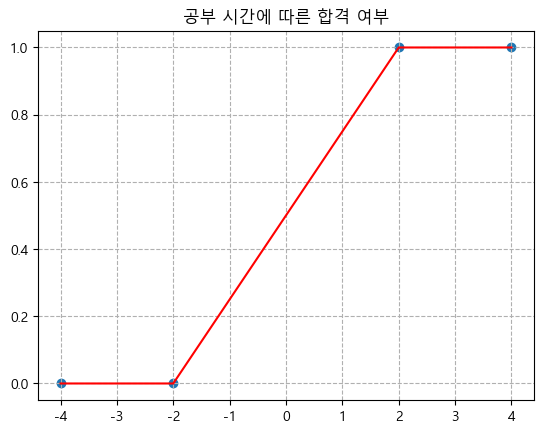

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train, color='red')
plt.grid(visible=True, linestyle='--')
plt.title('공부 시간에 따른 합격 여부')
plt.show()

- 위와 같은 데이터에 직선을 사용하게 되면, 오차가 너무 크게 생긴다.
- 기존의 가설을 S모양 그래프로 만들 수 있는 함수로 감싸주어야 하고, 이 f 함수는 시그모이드 함수이다.
- 따라서 로지스틱 회귀에서는 아래와 같은 가설을 사용하게 된다.

<img src='./images/logistic_h.png' style='margin-left: 25px'>
<img src='./images/logistic_sigmoid.png' style='margin-left: 25px'>

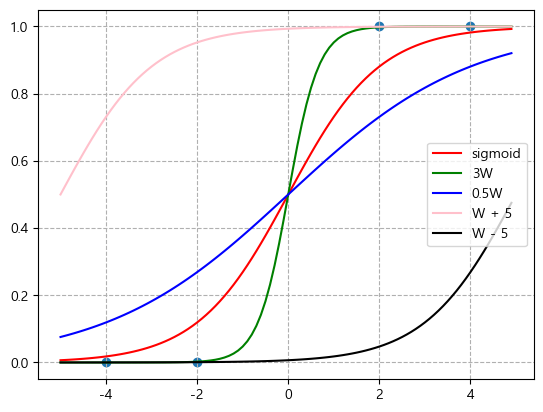

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

sigmoid_x = np.arange(-5, 5, 0.1)
sigmoid_y1 = 1/(1 + np.exp(-1 * sigmoid_x)) # 시그모이드 원본
sigmoid_y2 = 1/(1 + np.exp(-3 * sigmoid_x))
sigmoid_y3 = 1/(1 + np.exp(-0.5 * sigmoid_x))
sigmoid_y4 = 1/(1 + np.exp(-1 * (sigmoid_x + 5)))
sigmoid_y5 = 1/(1 + np.exp(-1 * (sigmoid_x - 5)))

plt.scatter(X_train, y_train)
plt.plot(sigmoid_x, sigmoid_y1, color="red", label='sigmoid')
plt.plot(sigmoid_x, sigmoid_y2, color="green", label='3W')
plt.plot(sigmoid_x, sigmoid_y3, color="blue", label='0.5W')
plt.plot(sigmoid_x, sigmoid_y4, color="pink", label='W + 5')
plt.plot(sigmoid_x, sigmoid_y5, color="black", label='W - 5')
plt.grid(visible=True, linestyle='--')
plt.legend()
plt.show()

- 위에서 확인할 수 있듯이, W는 기울기가 아니라 경사도를 결정하게 된다. 즉, W가 커지면 경사가 높아지고 작아지면 경사가 낮아진다.
- b는 커질 수록 왼쪽으로 이동하고, 작아질 수록 오른쪽으로 이동한다.
- MSE(평균 제곱 오차) 수식을 통해 경사도와 오차에 대한 그래프를 그리고 미분을 진행하면 다음과 같다.

<img src='./images/sigmoid_loss_function.png' style='margin-left:20px'>
<img src='./images/sigmoid_loss_function_graph.png' style='margin-left: 20px'>

- 경사 하강법을 통해 오차가 최소로 되는 곳에 도착해도 해당 부분이 최소가 아닐 수 있기 때문에(Local Minimum),  
  실제 최소가 되는 곳(Global Minimum)까지 가야한다. 이는 많은 기술을 요하므로 다른 loss function을 고려해봐야 한다.

---

- 아래 그래프는 y= 0.5에 대칭하는 log 함수이다.

<img src='./images/sigmoid_gradient_descent.png' style='margin-left: 20px'>

- 실제값이 0 일 때 예측값이 1에 가까워지면 loss가 점점 커지고, 실제값이 1일 때 예측값이 0에 수렴해도 loss가 점점 커진다.
- 위 로그 함수를 수식으로 나타내면 다음과 같다.

<img src='./images/sigmoid_gradient_descent02.png' style='margin-left: 20px'>

- 위 식을 통해 W에 대한 loss function을 구하는 식은 아래와 같다.

<img src='./images/sigmoid_gradient_descent03.png' style='margin-left: 20px'>

- 실제값 y와 예측값 H(x)의 차이가 커질 수록 loss값이 커지고 차이가 작아지면 loss값이 작아진다.  
  위의 loss function에 대해서 경사 하강법을 수행하며 최적의 경사도(W)를 찾아간다.

<img src='./images/sigmoid_gradient_loss_function.png' style='margin-left: 20px'>

In [22]:
import torch
from torch.optim import SGD
from torch.nn.functional import binary_cross_entropy

X_train = torch.FloatTensor([[-4], [-2], [2], [4]])
y_train = torch.FloatTensor([[0], [0], [1], [1]])

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=0.01)

epochs = 1000

for epoch in range(1, epochs + 1):
    #H = 1 / (1 + torch.exp(-(X_train.matmul(W) + b)))
    H = torch.sigmoid(X_train.matmul(W) + b)

    # losses = -(y_train * torch.log(H) + (1 - y_train) * torch.log(1 - H))
    # loss = losses.mean()
    loss = binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, Loss: {:.4f}'\
             .format(epoch, epochs, W.item(), b.item(), loss.item()))

 100/1000: W: 0.6730, b: -0.0000, Loss: 0.1496
 200/1000: W: 0.9191, b: 0.0000, Loss: 0.0867
 300/1000: W: 1.0749, b: 0.0000, Loss: 0.0620
 400/1000: W: 1.1902, b: -0.0000, Loss: 0.0486
 500/1000: W: 1.2821, b: 0.0000, Loss: 0.0401
 600/1000: W: 1.3587, b: 0.0000, Loss: 0.0342
 700/1000: W: 1.4246, b: 0.0000, Loss: 0.0299
 800/1000: W: 1.4823, b: 0.0000, Loss: 0.0265
 900/1000: W: 1.5338, b: 0.0000, Loss: 0.0238
1000/1000: W: 1.5803, b: 0.0000, Loss: 0.0217


In [23]:
H >= 0.5

tensor([[False],
        [False],
        [ True],
        [ True]])

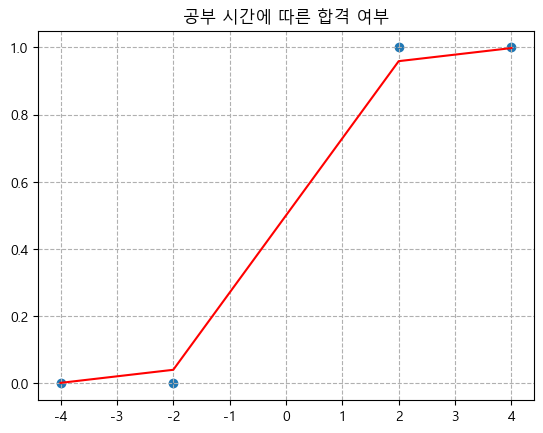

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X_train, y_train)
plt.plot(X_train, H.detach(), color='red', label='sigmoid')
plt.grid(visible=True, linestyle='--')
plt.title('공부 시간에 따른 합격 여부')
plt.show()

In [25]:
import pandas as pd

h_df = pd.read_csv('./datasets/heart.csv')
h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

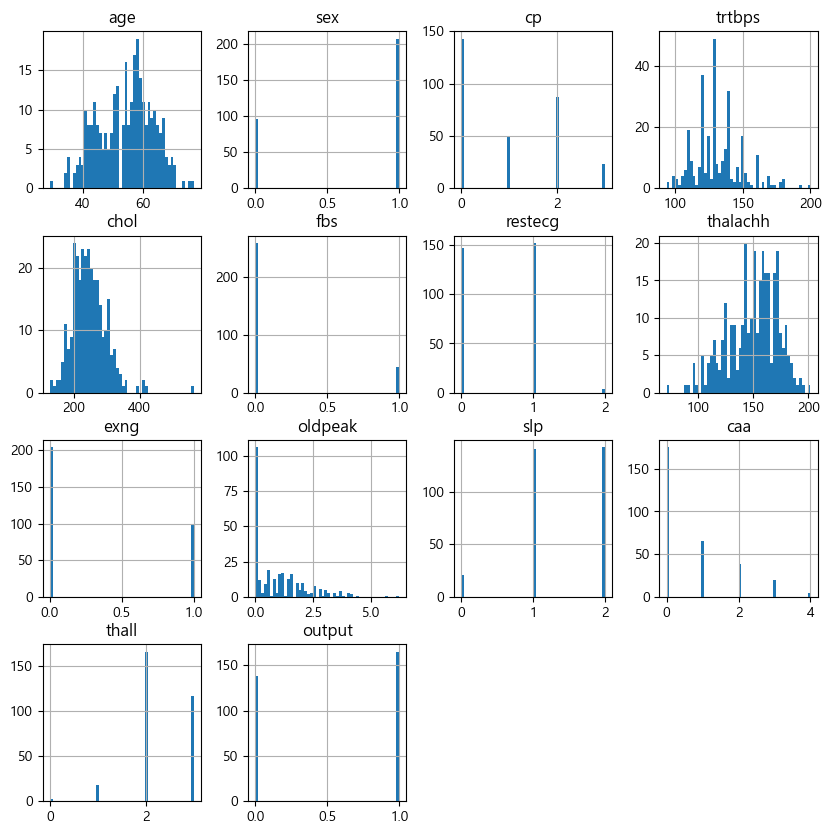

In [26]:
h_df.hist(figsize=(10,10), bins=50)

In [27]:
import torch
from torch.nn import Sequential, Linear, Sigmoid
from torch.nn.functional import binary_cross_entropy
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

logistic_r = Sequential(
    Linear(13, 1), # 13개 input을 통해 결과 출력
    Sigmoid(),
)

optimizer = SGD(logistic_r.parameters(), lr=0.000095)

epochs = 100000

for epoch in range(1, epochs + 1):
    H = logistic_r(X_train)
    loss = binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}', end=', ')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item())}\nLoss: {np.round(loss.item(), 4)}')
        print('=' * 90)

Epoch: 10000/100000
W1: -0.0182, W2: 0.0094, W3: 0.3134, W4: -0.025, W5: -0.0033, W6: -0.2062, W7: -0.0893, W8: 0.0334, W9: -0.0551, W10: -0.2315, W11: -0.1629, W12: -0.1381, W13: 0.1833, b: 0.0
Loss: 0.5053
Epoch: 20000/100000
W1: -0.0146, W2: -0.047, W3: 0.4105, W4: -0.0239, W5: -0.0029, W6: -0.2039, W7: -0.0738, W8: 0.0319, W9: -0.094, W10: -0.2915, W11: -0.1327, W12: -0.2279, W13: 0.1016, b: 0.0
Loss: 0.4697
Epoch: 30000/100000
W1: -0.012, W2: -0.0973, W3: 0.4881, W4: -0.0232, W5: -0.0026, W6: -0.2018, W7: -0.0586, W8: 0.031, W9: -0.1267, W10: -0.3385, W11: -0.1062, W12: -0.3004, W13: 0.0306, b: 0.0
Loss: 0.4454
Epoch: 40000/100000
W1: -0.0099, W2: -0.1428, W3: 0.551, W4: -0.0228, W5: -0.0023, W6: -0.1999, W7: -0.0438, W8: 0.0305, W9: -0.1547, W10: -0.3762, W11: -0.0825, W12: -0.3599, W13: -0.0319, b: 0.0
Loss: 0.428
Epoch: 50000/100000
W1: -0.0082, W2: -0.1842, W3: 0.6026, W4: -0.0225, W5: -0.0021, W6: -0.1982, W7: -0.0295, W8: 0.0302, W9: -0.179, W10: -0.4069, W11: -0.0608, W12: 

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [29]:
get_evaluation(y_test.detach(), logistic_r(X_test) >= 0.5)

오차 행렬
[[20  8]
 [ 3 30]]
정확도: 0.8197, 정밀도: 0.7895, 재현율: 0.9091, F1: 0.8451, ROC-AUC: 0.8117
################################################################################


sklearn.linear_model.LogisticRegression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 일반적으로 데이터 세트가 작을 경우 liblinear의 성능이 좋고, 큰 경우 'sag', 'saga'가 더 좋다.
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
logistic_r = LogisticRegression(solver='liblinear', penalty = 'l2', C=1, random_state=124)
logistic_r.fit(X_train, y_train)
prediction = logistic_r.predict(X_test)

오차 행렬
[[20  8]
 [ 2 31]]
정확도: 0.8361, 정밀도: 0.7949, 재현율: 0.9394, F1: 0.8611, ROC-AUC: 0.8268
################################################################################


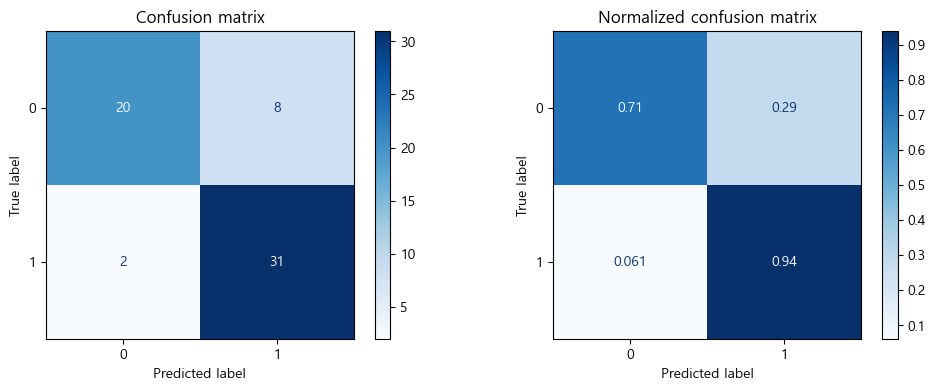

In [31]:
get_evaluation(y_test, prediction, logistic_r, X_test)